In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from math import e
from joblib import dump, load
from xskillscore import rmse
from sklearn import preprocessing

In [2]:
era5=xr.open_dataset('ERA5_metvars.nc')
era5

<xarray.Dataset>
Dimensions:    (latitude: 18, longitude: 26)
Coordinates:
  * longitude  (longitude) float32 50.0 52.0 54.0 56.0 ... 94.0 96.0 98.0 100.0
  * latitude   (latitude) float32 34.0 32.0 30.0 28.0 26.0 ... 6.0 4.0 2.0 0.0
Data variables:
    t2m        (latitude, longitude) float32 ...
    ws10m      (latitude, longitude) float32 ...
    rh10m      (latitude, longitude) float32 ...
    inv        (latitude, longitude) float32 ...
    ushear     (latitude, longitude) float32 ...
    w700       (latitude, longitude) float32 ...
    z500       (latitude, longitude) float32 ...

In [3]:
modelNames=['EC-Earth3','IPSL-CM6A-LR','ACCESS-CM2','IITM-ESM',
            'MPI-ESM1-2-LR','MIROC6','MRI-ESM2-0','MPI-ESM1-2-HR',
            'CanESM5','INM-CM5-0','INM-CM4-8']

In [13]:
tData=xr.open_dataset('EC-Earth3_metvars.nc')
rmse(tData.t2m,era5.t2m,skipna=True)
tData.z500
era5.z500/9.81

<xarray.DataArray 'z500' (latitude: 18, longitude: 26)>
array([[      nan,       nan,       nan,       nan,       nan,       nan,
              nan,       nan,       nan,       nan,       nan, 5661.633 ,
              nan,       nan,       nan,       nan,       nan,       nan,
              nan,       nan,       nan,       nan,       nan,       nan,
              nan,       nan],
       [      nan,       nan,       nan,       nan,       nan,       nan,
              nan,       nan,       nan,       nan,       nan, 5685.3906,
        5688.6274,       nan,       nan,       nan,       nan,       nan,
              nan,       nan,       nan,       nan,       nan,       nan,
              nan,       nan],
       [5705.2915,       nan,       nan,       nan,       nan,       nan,
        5710.8525,       nan,       nan,       nan,       nan, 5713.939 ,
        5715.4023, 5716.739 , 5717.599 ,       nan,       nan,       nan,
              nan,       nan,       nan,       nan,       nan,       nan,
              nan,       nan],
       [5739.293 , 5739.9526,       nan,       nan,       nan,       nan,
              nan,       nan,       nan, 5744.1313, 5744.119 , 5744.6475,
        5745.1226, 5745.3867, 5744.7275, 5743.7217, 5742.245 ,       nan,
              nan,       nan,       nan,       nan,       nan,       nan,
              nan,       nan],
...
       [5858.3237, 5858.1875, 5858.2007, 5858.0947, 5858.132 , 5858.1294,
        5857.9653, 5857.862 , 5857.689 , 5857.5312, 5857.3047, 5857.079 ,
        5856.755 , 5856.479 , 5856.1006, 5855.6035, 5855.3613, 5855.166 ,
        5855.1016, 5854.9736, 5854.925 , 5854.752 , 5854.6997, 5854.5674,
        5854.627 , 5854.2983],
       [5856.782 , 5856.7925, 5856.703 , 5856.7583, 5856.7397, 5856.7646,
        5856.691 , 5856.615 , 5856.388 , 5856.28  , 5856.12  , 5855.943 ,
        5855.6885, 5855.372 , 5855.114 , 5854.813 , 5854.528 , 5854.269 ,
        5854.098 , 5853.9976, 5853.7915, 5853.727 , 5853.3354, 5853.6123,
        5854.376 , 5853.11  ],
       [5855.986 , 5855.932 , 5855.9683, 5855.9546, 5856.0176, 5855.9478,
        5855.9585, 5855.8604, 5855.7974, 5855.6626, 5855.5464, 5855.337 ,
        5855.203 , 5854.9404, 5854.6914, 5854.394 , 5854.175 , 5853.8867,
        5853.744 , 5853.572 , 5853.433 , 5853.2314, 5853.0054, 5852.883 ,
        5853.019 , 5852.9497],
       [5855.693 , 5855.7646, 5855.754 , 5855.7744, 5855.763 , 5855.7603,
        5855.6885, 5855.705 , 5855.555 , 5855.5146, 5855.35  , 5855.293 ,
        5855.105 , 5854.9043, 5854.653 , 5854.41  , 5854.15  , 5853.9165,
        5853.6816, 5853.463 , 5853.2524, 5853.124 , 5852.8833, 5852.791 ,
        5852.7207, 5852.319 ]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 50.0 52.0 54.0 56.0 ... 94.0 96.0 98.0 100.0
  * latitude   (latitude) float32 34.0 32.0 30.0 28.0 26.0 ... 6.0 4.0 2.0 0.0

In [14]:
mList=[]
cList=[]
vList=[]
rList=[]
for m in modelNames :
    mData=xr.open_dataset(m+'_metvars.nc')
    #print(mData)
    mList.append(m)
    vList.append('t2m')
    cList.append(xr.corr(mData.t2m, era5.t2m).values[()])
    rList.append(rmse(mData.t2m, era5.t2m,skipna=True).values[()])
    print(xr.corr(mData.t2m, era5.t2m).values[()])
    print(rmse(mData.t2m, era5.t2m,skipna=True).values[()])
    mList.append(m)
    vList.append('ws10m')
    cList.append(xr.corr(mData.ws10m, era5.ws10m).values[()])
    rList.append(rmse(mData.ws10m, era5.ws10m,skipna=True).values[()])
    mList.append(m)
    vList.append('rh10m')
    cList.append(xr.corr(mData.rh10m, era5.rh10m).values[()])
    rList.append(rmse(mData.rh10m, era5.rh10m,skipna=True).values[()])
    mList.append(m)
    vList.append('inv')
    cList.append(xr.corr(mData.inv, era5.inv).values[()])
    rList.append(rmse(mData.inv, era5.inv,skipna=True).values[()])
    mList.append(m)
    vList.append('ushear')
    cList.append(xr.corr(mData.ushear, era5.ushear).values[()])
    rList.append(rmse(mData.ushear, era5.ushear,skipna=True).values[()])
    mList.append(m)
    vList.append('w700')
    cList.append(xr.corr(mData.w700, era5.w700).values[()])
    rList.append(rmse(mData.w700, era5.w700,skipna=True).values[()])
    mList.append(m)
    vList.append('z500')
    cList.append(xr.corr(mData.z500, era5.z500/9.81).values[()])
    rList.append(rmse(mData.z500, era5.z500/9.81,skipna=True).values[()])
    
  

0.9752368095517511
1.4168105
0.9700788514412665
2.1347997
0.9685694768391568
1.4797935
0.9557921739478041
1.8616903
0.9562924847415917
1.8626386
0.9331298905540989
1.4424657
0.9723021990485629
1.3640677
0.968741650731669
1.5545875
0.9585750691765957
2.3599591
0.961566835781932
2.603937
0.9633588950321068
2.6940277


   Variables     Models     Value
0        t2m  EC-Earth3  0.975237
1      ws10m  EC-Earth3  0.964933
2      rh10m  EC-Earth3  0.905942
3        inv  EC-Earth3  0.937496
4     ushear  EC-Earth3  0.940183
..       ...        ...       ...
72     rh10m  INM-CM4-8  0.852792
73       inv  INM-CM4-8  0.883921
74    ushear  INM-CM4-8  0.802084
75      w700  INM-CM4-8  0.743940
76      z500  INM-CM4-8  0.963972

[77 rows x 3 columns]
                  rh10m       t2m     ws10m       inv    ushear      w700  \
EC-Earth3      0.905942  0.975237  0.964933  0.937496  0.940183  0.789120   
IPSL-CM6A-LR   0.829069  0.970079  0.922538  0.886863  0.822308  0.700929   
ACCESS-CM2     0.894097  0.968569  0.915659  0.900981  0.880688  0.811345   
IITM-ESM       0.832666  0.955792  0.918902  0.795193  0.646411  0.655849   
MPI-ESM1-2-LR  0.769629  0.956292  0.909570  0.888846  0.648747  0.723159   
MIROC6         0.823398  0.933130  0.911252  0.814963  0.848438  0.766516   
MRI-ESM2-0     0.889625  0.972

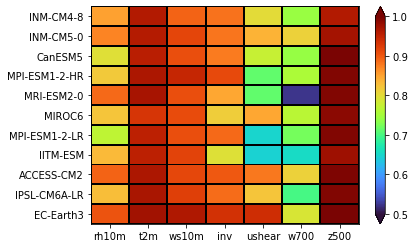

In [15]:
df = pd.DataFrame({'Variables' : vList, 'Models':mList, 'Value':cList})
print (df)  


allVars = ['rh10m','t2m','ws10m','inv','ushear','w700','z500']
allmodels = modelNames
#full = pd.DataFrame(columns=allmodels, index=allVars)
#piv = pd.pivot_table(df, index='Variables', columns='Models', values='Value')
full = pd.DataFrame(columns=allVars, index=allmodels)
piv = pd.pivot_table(df, index='Models', columns='Variables', values='Value')

full.update(piv)

piv = full
piv = piv.fillna(0)
print(piv)

fig, ax = plt.subplots()
#ax.set_aspect('equal')
plt.axis([0, 7, 0, 11])
heatmap = ax.pcolormesh(piv,  alpha=2,cmap='turbo', vmin=0.5, vmax=1,edgecolors='black')

ax.set_yticks(np.arange(piv.shape[0]) + 0.5, minor=False)
ax.set_xticks(np.arange(piv.shape[1]) + 0.5, minor=False)
ax.set_xticklabels(piv.columns, minor=False)
ax.set_yticklabels(piv.index, minor=False)
fig.colorbar(heatmap, ax=ax,extend='both')
plt.savefig('MetvarsCC_CMIP6.png')
plt.show()


In [16]:
df = pd.DataFrame({'Variables' : vList, 'Models':mList, 'Value':rList})
print (df)  





   Variables     Models      Value
0        t2m  EC-Earth3   1.416811
1      ws10m  EC-Earth3   0.738927
2      rh10m  EC-Earth3   0.082148
3        inv  EC-Earth3   0.857351
4     ushear  EC-Earth3   0.000432
..       ...        ...        ...
72     rh10m  INM-CM4-8   0.113930
73       inv  INM-CM4-8   2.433265
74    ushear  INM-CM4-8   0.000600
75      w700  INM-CM4-8   0.024535
76      z500  INM-CM4-8  53.340366

[77 rows x 3 columns]


                  rh10m       t2m     ws10m       inv    ushear      w700  \
EC-Earth3      0.082148  1.416811  0.738927  0.857351  0.000432  0.022296   
IPSL-CM6A-LR   0.108798  2.134800  1.035500  2.300366  0.000772  0.030878   
ACCESS-CM2     0.086302  1.479794  0.835333  1.312276  0.000524  0.021171   
IITM-ESM       0.136131  1.861690  0.766767  1.928369  0.000895  0.028148   
MPI-ESM1-2-LR  0.118794  1.862639  0.930148  1.796931  0.000761  0.024017   
MIROC6         0.138248  1.442466  0.931728  1.838587  0.000805  0.022225   
MRI-ESM2-0     0.076673  1.364068  1.514063  1.242702  0.000885  0.038597   
MPI-ESM1-2-HR  0.126747  1.554587  0.716902  1.707720  0.000689  0.022888   
CanESM5        0.138077  2.359959  1.172150  2.077457  0.000788  0.022759   
INM-CM5-0      0.114514  2.603937  0.802363  2.380951  0.000597  0.020281   
INM-CM4-8      0.113930  2.694028  0.913183  2.433265  0.000600  0.024535   

                    z500  
EC-Earth3      13.886448  
IPSL-CM6A-LR   62.966

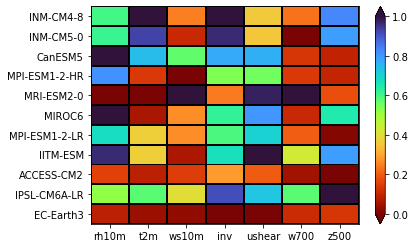

In [17]:
allVars = ['rh10m','t2m','ws10m','inv','ushear','w700','z500']
allmodels = modelNames
#full = pd.DataFrame(columns=allmodels, index=allVars)
#piv = pd.pivot_table(df, index='Variables', columns='Models', values='Value')
full = pd.DataFrame(columns=allVars, index=allmodels)
piv = pd.pivot_table(df, index='Models', columns='Variables', values='Value')

full.update(piv)

piv = full
piv = piv.fillna(0)
print(piv)

normalized_piv=(piv-piv.min())/(piv.max()-piv.min())
print(normalized_piv)

fig, ax = plt.subplots()
#ax.set_aspect('equal')
#plt.axis([0, 5, 0, 11])
# getting the original colormap using cm.get_cmap() function
orig_map=plt.cm.get_cmap('turbo')
  
# reversing the original colormap using reversed() function
reversed_map = orig_map.reversed()
heatmap = ax.pcolormesh(normalized_piv,  alpha=2,cmap=reversed_map,edgecolors='black')
#heatmap = ax.pcolormesh(final_df,  alpha=2,cmap='YlOrRd',edgecolors='black')


#, vmin=0.65, vmax=0.95

ax.set_yticks(np.arange(piv.shape[0]) + 0.5, minor=False)
ax.set_xticks(np.arange(piv.shape[1]) + 0.5, minor=False)
ax.set_xticklabels(piv.columns, minor=False)
ax.set_yticklabels(piv.index, minor=False)
fig.colorbar(heatmap, ax=ax,extend='both')
plt.savefig('MetvarsRMSE_CMIP6.png')
plt.show()


In [ ]:

data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAZ8AAAD4CAYAAAAzZOvCAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjMuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8vihELAAAACXBIWXMAAAsTAAALEwEAmpwYAAA4zUlEQVR4nO3de5wcVZ338c93JgEiQe6gAhIukYsxhIsoIm4QFVBW4BGXRHSFR0B2RZSVFVDXjais+4AiCIIRWcBFgiJIuCssWe6XBEJCQoBwD4jclGtIMjPf5486DTWd7q6eSU93Mfzer1e90lXn1KnTPZM6c06dPj/ZJoQQQminrk5XIIQQwltPND4hhBDaLhqfEEIIbReNTwghhLaLxieEEELbjeh0Bd5KJMXUwhBCs561vW6rCpM0fvSI1e9+ueeFkbZ7WlXuYEXj02a7Lf6PTlehn2tHHQvAhLV27nBN+pv9/E0IWPrdTTpdleWMPO5hoHyf2d1/vQmAF279UIdr0t/bP3AzAhb/y4adrko/q/xkEUh84vilna7Kcv74rZXAfrSVZa4+cu27+9zLu1cduwxQK8sejBh2CyGEYU7S+D562Xj0e3jmtSeR1PGOR8crEEIIYWitPnLtu9db5V2M6BrJaiPXYN1V3tXx3k/0fEIIYRir9HpWHfl2ANZbZYNS9H6i5xNCCMNYpddTUZbeT/R8QghhmKru9VSUoffTscZH0svp3zGSLOmrubRTJR2YXp8t6VVJq+XST07nrFOn7D0lzZR0r6QFkk5Mx6ek8zbP5T0yHduhqozpku5pUP/JkuZKmiPpqnp1CSGETll95Np3v2OVjZY7Xun9pJlvDUk6S9LT9e6HypwiaWG6H27XTN3K0vN5GviapJXqpC8E9gaQ1AXsCjxRK6OkccCpwOdtbwWMAx7KZZkLTMrt7wfMryrj/wAv16ts+mvhZGBX2+OBOcDh9fKHEEK71ev1VAyg93M2sEeD9D2BsWk7FDi9mfqVpfF5BrgW+GKd9POB/dPricBNQL0vSX0T+KHtBQC2e2z/PJf+B95oyDYFXkjXJx0bDfwL8IMG9VXaVpUk4O3Akw3yhxBCW9Xr9VRUej/0/2N8ObavB55vkGVv4FxnbgXWkPTOovqVpfEB+BHwDUndNdIeANaVtCYwGZjWoJxxwKwG6S8Cj6ce0mTggqr07wM/Bl6tV4DtZcA/kfWingS2Bn5VK6+kQ9MQ4MwGdQohhJZa0re4bq+nYu2V14fsvjsztx06wEttADye21+UjjVUmsbH9sPA7cDn6mS5iKyF/gBwwwpebloqax/g4spBSROAzW1fXPu01/ONJGt8tgXeRTbsdmytvLan2t7B9g610kMIYSioiYlsypqARyv3qLRNHfCllle4lFjZplofD1wIXF8jbRpwJ3CO7b5stAskfQU4JOX5JDAP2B64u8F1LgVOAGbafrFSFrATsL2kR8g+m/UkzQB2443e1PR0PrYfTHX4LXDMwN5qCCEMHamb7pVWb5inu3dxKy61CMiP721IE48hStX42F4gaT6wF1kvKJ/2mKRvA9dUHT8NOK2yL+kE4CJJN9q+P01Q+Lrtn+TOWSzpaOD+qrJOJz0skzQGuMz2xJQ8IXeNdwFbS1rX9jPAx4F7V+S9hxBCS6kLda/cOIt7W3Gl6cDhkqaRjUy9YPvPRSeVqvFJfgjcVSvB9i+KTrY9R9LXgfMlvY2s+3d5jXyNnhsVXeNJSd8Drpe0DHgUOHCw5YUQQuupsPGhicWtJZ1PNtFrHUmLgH8HRgLYPgO4gmzUaSHZs/KDmqldxxof26PTv4+QTRKoHL+b3LMo2wfWOX9Mg7IvAy6rcXxKnfwTaxzrV68a6WcAZ9RLDyGEjurqpmulxhMOulT82N/25IJ0A18ZUN0oZ88nhBDCClITPR/1dS6cRDQ+IYQwHEmou9739lOWvpFtqszyovEJIYThSN10jVytYZYu97WpMstTNlwX2kGSUccDCPZX4p9/yT6p15X1Eyvbr1aFXc6fpaG8HxqAPWtFvh84+m0beNutGq/6tWTp37jjnv93ie19BnudwYqeTwghDEOSUHfjYTV1xbDbW8YHX/ppp6vQz62jvwaIXXf7Taer0s9112YTbG7ZstZqS531wQXZdyN22vobHa5Jf7fe+2MAXrr5Qx2uSX+jd7oZA98aUa6f5fE92c9xl1+15LsuLXXDl1rwWTXxzIeCxmkoReMTQgjDkbrQSqs2ztK3pE2VWV40PiGEMCx1oa6C2W4x7BZCCKGlmnnmE8NuIYQQWknqQiu9rXGe3lfaVJvlReMTQgjDVVfBLb4ofQh1LJ6PpJfTv2MkWdJXc2mnSjowvT5b0quSVsuln5zOWadO2XumoEj3Slog6cR0fEo6b/Nc3iPTsR3S/gxJ90manbb16lxje0lzU9zyU6Qyf2EghPCWk4bdGm9vwcanytPA1yTVezq2kDdCX3cBuwJP1MqYIpSeCnze9lZki4M+lMsyl/5hY/cD5lcVc4DtCWl7uk6dTieLV16JXd4oxnkIIbRXM41PBycclKXxeQa4FvhinfTzgf3T64nATUC9tcC/CfzQ9gIA2z22f55L/wNvNGSbAi+k6zctxSd/u+1b0oqu55JFRQ0hhHJQF4xcpWArCLkwhMrS+AD8iCyWeK1vVz0ArCtpTWAyWVTTesbxRtTRWl4EHk89pMnABTXy/Fcacvu3OsNpG5BF76uoG7Nc0qGV2OgN6hRCCC0m1D2i8dbVuS/+lqbxsf0wWfTSz9XJchHZcNkHgBtW8HLTUln7ABdXpR1g+33ALmn7Qo3zm45ZbntqJTb64KsbQggDJEH3iOKtQ0rT+CTHA0dTu17TgO8Df7LfWIpV0ldykwPeBcwDti+4zqVkjcpjtl/MJ9h+Iv37EvAbYEdJ3blrHEfW09kwd1pTMctDCKFtJDRy5cbbiILld4ZQqaZa214gaT6wF1kvKJ/2mKRvA9dUHT8NOK2yL+kE4CJJN9q+P01Q+Lrtn+TOWSzpaOD+fFmSRgBr2H5W0shUj2ts9wITqvK+JOmDwG3APwI/W8G3H0IILaTink0Hez6lanySHwJ31Uqw/Yuik23PkfR14HxJbyMbDru8Rr5az41WBq5ODU83WUP3yzqX+ifgbGAUcGXaQgihHAQUPdPp6tzgV8caH9uj07+PkE0SqBy/m9ywm+0D65w/pkHZlwGX1Tg+pU7+ibndoiG7yjkzydU7hBBKRV0wsmBYLYbdQgghtJIAdRf0fLrfgj2fEEIIQ0iCwsanc1Oto/EJIYThquiZjjrX81H2Bf3QDpJcupjxNrW/ttRpLmWtoM4XukqgbL9aFaW+xZT1QwOwZ63I9wNXf8cE73TQ/zbMs/jFRVz/83GX2N5nsNcZrOj5tFsp/yeWsU5lrVV5lfJXq+yG84cmFT/TiWc+bx0T1tq501XoZ/bzN4HEln+qt35qZyz42LogOGjZ4Z2uynL+a2T2tbL3/3Zxh2vS3x3/MAqAbS96ucM16e+ufVdFwLz3d25mVS1b37EUATM2K9t37WHig30r/MeXAZd42C0anxBCGI4kGFlwix8ZEw5CCCG0kigeVnsrfsk0hBDCEOsqmFBRlD6EovEJIYThSMIjG/dsitKHUjQ+IYQwHAnc3bhn4w72fMo3zSOR9A5J0yQ9KGm+pCskvWcQ5Zwt6eFcSISb0/H1JV0m6e5K+en4GEmW9P1cGetIWibp1LR/oKRncmUe3Kr3HUIIreKu4q0ZkvaQdJ+khZKOqZG+uqRL0/10nqSDisosZc8nRQ+9GDjH9qR0bAKwPlVhEJr0r7YvrDp2HFlsoJNT+eNzaQ+RhVP4t7T/WbI4QXkX2C7fPOAQQoDmej4F6QApuvRpwMfJYpndIWm67fm5bF8B5tv+e0nrAvdJOs/20nrllrXnsyuwzPYZlQO2ZwN3SbpW0p2S5kraG17vrdwr6Zep1f2jpFEF13gnuVDYtufk0hYD90qqfLt4f+C3LXhfIYTQFhb0jSzYmut+7AgstP1QakymAXtXXw5YLXUcRgPPAz2NCi1r4zMOmFXj+GvAvra3I2ugfpzeLMBY4DTb7wX+Bnwmd94JuSGy89Kx04BfSbpO0rdTFNS8acAkSRsCvSwfqfQzkuZIulDSRvXeiKRDJc2UNLP4bYcQQuv0dblwAzau3KPSdmhVMRsAj+f2F6VjeacCW5HdJ+cCX8tHnK6llMNuDQg4XtJHgD6yD2D9lPZw6h1B1nCNyZ233LCb7aslbQrsAexJ1qvKx+e5iixs91+AC6rqcSlwvu0lkg4DzgE+WqvCtqcCUyGt7RZCCO0gcNF3SLP0RwvWdqs1Nld9L9sdmE12H9wM+JOkG2y/WK/QsvZ85lE7qNsBwLrA9rYnkDUMq6S0Jbl8vTTRsNp+3vZvbH8BuAP4SC5tKVkj9g3g91XnPWe7cr1f1qlrCCF0jAW9I/sabyMadk4qFgH50Z0NWX4k6CDgImcWAg8DWzYqtKyNz/8AK0s6pHJA0vuBjYGnbS+TtGvaHxRJH01htpG0Gllr/VhVth8DR9t+rurcd+Z2Pw3cO9h6hBDC0CgeckvDbkXuAMZK2kTSSsAkYHpVnseA3SCbSQxsQTZxq65SDrvZtqR9gZ+maX2vAY8AU4BT0vOT2cCCJos8QdJ3cvs7kvVWTpXUQ9YIn2n7DkljcvWYx/Kz3ACOkPRpsgdqzwMHNv3mQgihDSxwd+PGxU00PrZ7JB0OXE02UHeW7XnpkQNpYtj3gbMlzSUbpjva9rONyi1l4wNg+0ngH2ok7VTnlNef19g+Mff6wDr5T0hb9XUfyZeVO342cHZ6fSxwbJ1yQwihFPq6Gw+rFaVX2L4CuKLqWH428pPAJwZSt9I2PiGEEAbPMj0jehvmafKZz5CIxieEEIYjQV/BsFuTz3yGRDQ+IYQwTLmrcc+mKH0oycM5jGzJlPZ7PmWMY2/X/nZBKZS2YuVkl/ITM+X+SRpm2d6hOGdto8ZO8KanXdcwz7KnF/HAF8ZfUvA9nyERPZ9Q3jj2Ja1WiStWWmX9xMpar1awTF9342c+zU44GArR+LTZbid37oddy7Vf60LAfTut3Omq9POeW7Lv8H5rROfC/NZzfG/2H3pK32cKcrbXlK7su9BH9n6xwzXp76Suc0r7Oybg+rHl+x37yAO9LWkYyzzsFo1PCCEMQ5bpGbmsYZ7eEQ3X/hxS0fiEEMJwJEfPJ4QQQvv1dRU88ylIH0rR+IQQwrBU7p5P4cKiKaT0r3P7I1II6cvSfj6k9PzKYqDp+Kl1ynwkBYOrxNg5JR3/oKTb0rF7JU3JlWVJu+XK2Dcd2y/tH55CvFrSOg3ez3kpHOw9ks6SNLJOvhm5YHKVgHX3pNcTJb0g6S5JCySdWKuMEELoFMv0jljWeOvu3DOfZla1fgUYl4sM+nHgiao8F6QQBxPJ4u2sT7FdbU9I2xHp2DnAoamscfSPHjoXmJzbnwTcndu/CfgY8GjBdc8jW+r7fcAo4OAm6lrLDba3BbYF9pK08yDLCSGE1hO4u7dw65RmQypcCXwqvZ4MnF8rk+2ngQcZfKiD9YA/p7J6q2KE3wDsKGmkpNHA5mQrW1eufVdaFLQh21ekmBMGbieLTTFothenelRH9gshhA4y7uptuFHmYbekElJ6FWA8cFutTCky6KbAwibKvC437HZkOnYScJ+kiyV9OV2vwsA1ZBHz9mb5eBIDkobbvkAWsbSe8yp1pGpF11w5a5KF8L5+ReoTQgitZBl3L2u8dTWeij2UmppwYHtOinMzmdo34f0lfZgsmuiXbT+v4iVbdq2O92D7OEnnkS3N/bl0vYm5LNOAI4DVySKMfquZ+tfxc+B62zc0yHOA7ZmQPfMBLsul7SJpDlnQpB/ZfqpWASkeenVM9BBCGHIumM1W6gkHOdOBE6k95HZBenbzAdsX5xMkded6OMcVXcT2g7ZPJ4uKt42ktXNpt5M9C1rH9v3NVFrS1enaZ+aO/TtZOO5/aZSvwA22x5M9O/onSRPqvJ+ptndYkTWaQghhwORsWK1o65CBTLU+C3jB9lxJE5s9yXYvMKGZvJI+BVyRnseMBXqBv1VlO5Yssmmz19+96hoHkw3d7Wa7r16+AZR/v6T/AI6m/4SIEELorKLv8XTwez5N93xsL7J9cguvnX/mc2469gWyZz6zgV+TDXv1+3RsX2l7uaVaJR0haRHZBII5DXowZwDrA7eka3+3Be/lDOAjkjZpQVkhhLDiZOhe1njrKvHyOrZH1zg2A5iRXp9NCi9dlafm8ZQ2ps7xSXWO17vGgbnXpwCn1Dq/6pxmn3NNrNp/hBReO//+0/5iYrZbCKFUXOqeT6xwEEIIw5QKnukUpQ+laHxCCGEYkowKplKrzMNuIYQQ3oxMV0HPpk8RRvstQZJLF7K6xCGOS6uMH1iZlTQi+nAPo73S+M39jj+e1DBPzxPP8OcdvhRhtEMIIbSGZLq7lzbM4+6Sr3AQWudb3QP5Xu/QO74nC9dbtnDVx/dks3AmrFW+9Vrvfv4mAJZ8e7BLGA6NlX6Yram74yblCqN9+8PnYMr3s5ydfo5/+fRqHa7J8taf/lILSjFdBcNqRelDKRqfEEIYhgR0qyCYXDQ+IYQQWkqmq+B7PF0FjdNQisYnhBCGIWFGdhU88yn7qtYhhBDeXIQLh92K0odSND4hhDAcqbhx6WTj05apV5Is6de5/RGSnpF0Wdo/MO3PlrQgF1wOSVMkHVWn3N7c4qSzJR2Tju8l6S5Jd0uaL+nLubIsafNcGUemYztIepuky1Md5kn6UYP3tL2kuZIWSjpFTQQwCiGEdumij5W6ljTcioblKiTtIem+dL87pk6eiek+PE/S/xaV2a6ezyvAOEmj0iKcHweeqMpzge3DU/ye+yRdaPvxgnIX256QP5AilE4FdrS9SNLKwJhclrnAJOAHaX8/IB+u+0Tb10laCbhW0p62r6xx7dPJgsTdShZgbw+ycOMhhFAKIwp6Nr1N9HwkdQOnkd23FwF3SJpue34uzxpkATr3sP2YpPWKym3nl06uBD6VXk+mdlA6bD9HFob7nYO8zmpkjepzqbwltu/Lpf+BLAx3Jez3C8AzKe+rlXANtpcCd5KFaOhH0juBt9u+JcUeOhfYZ5D1DSGElsue+fQ03Jqc7bYjsND2Q+m+OI10D835HHCR7ccAbD9dVGg7G59pwCRJqwDjgdtqZZL0bmAVYE4TZY6qGnbb3/bzZFFXH5V0vqQDJOXf54vA45LGkTWCF9SpxxrA3wPX1kjegOwvgIpF1AmpIOlQSTMlzWzi/YQQQktIZoR6G2/0AmxcuUel7dCqojYA8qNQte537wHWlDRD0ixJ/1hUv7ZNOLA9R9IYshv+FTWy7C9pV2AL4BDbzUQrXW7YLV3rYEnvAz4GHEXWXTwwl2Ua2dDb7mThug/Kny9pBFnP7BTbD9W4bq3nOzWXI7M9lWwYMFvbLYQQ2kCYlbWkYZ4+LQV4tGBtt2budyOA7cnup6PIgnXeavv+eoW2e62X6cCJ1B5yu8D2e4FdgB9Lekc+UdJGuR7OYUUXsj3X9klkDc9nqpIvJYua+pjtF2ucPhV4wPZP07W7c9c+jqzlzw/HbQg8WVSnEEJoF9FEz6e5YbdFwEa5/Vr3u0XAVbZfsf0scD2wTaNC2z3V+izgBdtzJU2slcH2LWlm3NeAY3PHHwcmFF1A0mhghxRtlHTOo1XXWCzpaGC5VlnSD4DVgYNz+Xurry3pJUkfJBs+/EfgZ0V1CyGEdhHFEw66m1te5w5grKRNyCaKTSJ7xpN3CXBqGjVaCfgA0HBJ7bY2PrYXASc3kfU/gTslHV+Qb5Sk2bn9q4AfAt+U9AtgMdlMuwNr1GVa9TFJGwLfBhak6wOcavvMGtf+J7LQ3qPIJlPETLcQQmmIvsJht56CdADbPZIOB64GuoGzbM+rjEDZPsP2vZKuIntW3wecafueRuW2pfGxPbrGsRnAjPT6bLIbeSXtSaAy7DalQbn1lmL+ZJ38NcuyPTG329T3dWzPBMY1kzeEENpNghFqHKm0yWE3bF9B1bN622dU7Z8AnNBs/WKFgxBCGIaEK7PZ6uouSB9K0fiEEMIwJMwqaryCQY9iYdEQQggtlM12azzs1l2QPpSUfUE/tEN8z2d4KOsifvHLNXBl/VkCGGbZ3mGw56+//do+YObfN8zz0uOvcObGF15S8D2fIRE9nxBCGIYE8cwnvKGMcewFTFuvXH8D7v+0kaDnxC06XZXldB+VfT1suxdO73BN+rtz9X8CYNfTOhcauZbr/lkIuGXLepNTO+ODC3qxxJi//K7TVVnOI+t/FlZwVKqZZz5L4plPCCGEVhIu7NlEzyeEEEJLZcNujXvB3QXpQykanxBCGIZEHyvTeNhtZWLYLYQQQgtFzyeEEEJHFDUunWx82h1SoSUkOa18XdkfIekZSZel/QMlnZpeT5H0RAqHMF/S5Nx5kvQdSQ9Iul/SdZLem0sfLekXkh5Mccmvl/SBlLaGpAslLZB0r6Sd2vcJhBBCY12Ylb2s4baSO/cl0zdrz+cVYJykUbYXk8XseaJB/pNsnyhpLDBL0oW2lwFfAT4EbGP7VUmfAKZLem8KZncm8DAw1nZfCru9VSrzZLL4FftJWgl429C81RBCGAxHz2eIXAl8Kr2eTO0Adf3YfgB4FVgzHToa+KrtV1P6H4GbgQMkbUYWk+I7tvtS+kO2L5f0duAjwK/S8aW2/9aqNxZCCCtKQLfdcOvq4Ao3b+bGZxowSdIqwHiyoG4NSdqOLELp06kBWdX2g1XZZgLvTdvsFEiu2qbAM8B/SbpL0pmSVq1zzUMrsdGbf2shhLDiuugr2KLxGTDbc4AxZL2eKxrn5khJ95E1UFMK8oriZbJGANsBp9velmwY8Jg69Zxqe4cVWaMphBAGqguzknsLt87V781tOnAixUNuJ9neAtgfOFfSKrZfBF5Jz3HytgPmA/OAbSTV+owWAYtsV3pbF6bzQgihHAxdaWit3qYYdhu0s4DjbM9tJrPti8iG1b6YDp0AnCJpFICkjwEfBn6ThuNmAt9TiqctaaykvW0/BTwuqbLw2G5kDVYIIZSCgG5cuHXKm3W2GwC2F5HNOhuI44DfSPol8DOyyQdzJfUCTwF7pxl0AAcDPwYWSnoVeA7415T2VeC8NNPtIeCgFXozIYTQQsKM7Gs8m21EQfpQelM2PrZH1zg2A5iRXp8NnJ1eT6nKNwvIL5X8vbTVus6LwCF10mYD8RwnhFBa3QUdm6L0ofSmbHxCCCE0Vplq3UhR+lCKxieEEIYjQ1dB29LJKF7R+IQQwjAkYGRf49ZnZAfjDsod7Ha91Ugq5YddrhimGQMqY8UAl/ITKzGX8xMzlPeXDMCetSLfD9xi21X9yxu2bpjn6UVL+exWcy6xvc9grzNY0fMJHZxs2Vh5/y4qbcVKq7SfWHl/yVacoaugZ6MO9nyi8Wmzdzx4faer0M9Tm30ECZ6780Odrko/a217MxL0nLhFceY26z7qPgA+uXhKZytS5YpR2aTNd919d4dr0t+T48cj4G9fWLvTVeln9V8/h4AfrFy+rzt+Z0nfCjfY2bBb4zydHHaLxieEEIYhAd0FjUvRhIShFI1PCCEMR03MdovGJ4QQQksJGNnbeELFyM6tKxqNTwghDEeKCQchhBA6oeiZT1H6UGp6mockS/p1bn+EpGckXZb2D0z7syXNl3RI7vipdcp8RNLcdM5sSaek4x+UdFs6dq+kKbmyLGm3XBn7pmP7pf3DJS1Mx9Zp8H7Ok3SfpHsknSVpZJ18MyTtUHVsoqQXUiC5BZJObPJjDCGEthDQZTXemvwGlqQ90v1yoaSasctSvvdL6q3cjxsZyBzDV4BxlfADwMeBJ6ryXGB7AjAROF7S+k2Uu6vtCWk7Ih07Bzg0lTUO+G0u/1yyAHIVk4D83NKbgI8BjxZc9zxgS+B9wCiyFawH4oYUSG5bYC9JOw/w/BBCGDqGET1quHX3FDc+krqB04A9ga2ByZKW+/ZqyvefwNXNVG+gE9yvBD6VXk+mThA3208DDwIbD7D8ivWAP6eyem3nY+XcAOwoaaSk0cDmwOzcte+y/UjRBWxf4QS4HdhwMBVN4RdmAxsM5vwQQhgKWc+neGvCjsBC2w/ZXgpMA/auke+rwO+Bp5spdKCNzzRgkqRVgPFkYamXk6KDbgosbKLM63LDbkemYycB90m6WNKX0/UqDFwD7E72AUwf4HuorutI4AvAVYM8f01gLFDz26OSDpU0U9LMwdcyhBAGKE04KNqAjSv3qLQdWlXSBsDjuf1FVP2xLWkDYF/gjGarN6AJB7bnSBpD1uu5okaW/SV9GFgCfNn28ypeO2lX289WXec4SecBnwA+l643MZdlGnAEsDrwDeBbA3kfVX4OXG/7hgGet4ukOWSxgX6Uopsux/ZUYCqUd223EMLwI7KhtUa6s6nYjxas7VarkOp72U+Bo233NnHPBwY32206cCJZY1C9XsYFtg+vdVIaD5xVKcP2dxtdJIWxPj1FHH1G0tq5tNsljQMW276/mTcr6WpgfWCm7YPTsX8H1gW+3ChfHTfY3kvSe4AbJV2cAsyFEELnGbr6Gt8bi9KTRcBGuf0NgSer8uwATEv34nWAT0rqsf2HeoUOpvE5C3jB9lxJE5s9yXYvMKGZvJI+BVyRnseMBXqBv1VlOxZ4bQDX373qGgeTDd3tZruvXr4myr1f0n8AR9N/IkQIIXSMKP6eT1F6cgcwVtImZJPMJpGNSL3O9iavX1c6G7isUcMDA3/mg+1Ftk8e6HkN5J/5nJuOfYHsmc9s4NfAAanxytfjStvXVRcm6QhJi8ha5zmSzqxz3TPIeji3pGs36oldLmlR2n5Xp6yPpB9OCCF0XjPPfJp4EGC7BzicbBbbvcBvbc+TdJikwwZbvaZ7PrZH1zg2A5iRXp8NnF0jT83jKW1MneOT6hyvd40Dc69PAU6pdX7VOU29d9sT6yTNyOVZTMx2CyGUiKBwKnVXE1OtIZsdTNVzfts1Jxfk78eNxAoHIYQwHLl4+ZxYXieEEELLteiZz5CIxieEEIYhGbp7Gufp7uCq1vJwDiNbMpJcupjxLl+VIItuXMZ6QYlDQje5Tlfb2aWsmSntJwaAYZbtHYpz1rbtlqN901nbNMyz6C9L2OL/zLqk4Hs+QyJ6Pu1Wwsa+hFUCyluv8irvB1bWmpW1Xi0Rz3xC3k5bf6PTVejnlvk/RoLn7vxQp6vSz1rb3oyA361fvr9N90srV73j4Ws6W5EqT43JFnufsFa51rid/fxNSHD3U+/vdFX6Gb/+HSCxy686OPZUxw1f6l7hv75k6FrWuAz1dK75jcYnhBCGqej5hBBCaK8YdgshhNAJ6isYduvgg9VofEIIYRiSjZY17toUpQ+lAa/t1m6SXk7/jkkhr3fPrQX3cgrtOlvSuSm8tSV9KXf+tunYUXXK782VN7sSIlbSXilM9t3KwoJ/OR2fksrbPFfGkenYoKdFhhBCy/U1sXXIm67nY/tqUphWSTOAo2zPTPsTycJs7w/8Kp1SHWa72uIUrvt1KcDcVGBH24skrQyMyWWZm8r9QdrfD8hHWw0hhM4yqLdg2K1gWG4olb7nMwiPAatIWl9ZcIk9yMJ/D8RqZA3zcwC2l9i+L5f+B1IY2RS19QXgmRWsdwghtI6zYbXGWzQ+rXYh8FngQ8CdZJFV6xlVNey2v+3nyYLmPSrpfEkHSMp/Vi8Cj6eAdpOBC4bofYQQwiAZ+gq2mHDQcr8laxC2BM4na4TqWW7YDcD2wZLeB3wMOAr4OHBgLss0sqG33YHdgINqFZ7ioVfHRA8hhKFloGDYrTB9CA3Lno/tp4BlZA3GtZXjkjbK9XAKgyDZnmv7pFTOZ6qSLyULeveY7RcblDHV9g4rskZTCCEMWKXxKdo6ZLj2fAC+C6xnuzfFFcf24zQRylvSaGCHFCyPdM6j+Ty2F0s6Gri/dVUOIYQWsWFpwdJByzq3tNCwbXxs39xk1lEpXHfFVcAPgW9K+gWwGHiF/kNulWtMW8FqhhDC0CmazdbB2W6lb3wq4bttPwKMq0qbWLU/g1x469zxKQ3K766T9Mk6+WuW1SDcdgghtF9Tz3zaUpOaSt/4hBBCGAQDSwu+RdrBFQ6i8QkhhGHJuLdx41KUPpSi8QkhhOGomWG3eOYTQgihpWxcMNvNRcNyQ0iOWMVtI6mUH7bKFywUG0pYLQBcxg8MSh13vIwfmU05K1Zhz1qR7wdu966VffthGzbM8/gLPWz6k8cusb3PYK8zWNHzabNHdx3V6Sr0s/F1i8HwpzHl+r7xxx7J/iJbuMsqHa7J8ja/8TUAeqe+r8M16a/7kLkA/PWAtTpck/7WOO95MJy9Vrlu9F98Plte5lsj6k147Zzje1o0Da3EKxxE4xNCCMORiycUuC8mHIQQQmglu/CZTief+UTjE0IIw5HBBcNqjtluIYQQWq34ez7R+IQQQmgh95m+omG3Dq5wMCRTnCTtK8mStswd21HS9ZLuk7RA0pmS3pbS9pQ0U9K9Ke3EdHyKpCeqgr2tIeltks6TNFfSPZJuTCtRI+nbkuZJmpPyf6BOHd8j6QpJC9N1f5uin05Mdf9SLu+26dhRaf+EVM85ki6WtMZQfI4hhLAi3OvCrRmS9kj37oWSjqmRfkC6H86RdLOkbYrKHKr5tZOBG8mCrSFpfeB3wNG2twC2Ils9erUUDfRU4PO2tyJbPPShXFkn2Z6Q2/4GfA34i+332R4HfAlYJmknYC9gO9vjyQLBPV5dOUmrAJcDp9vePF33dGDdlGUusH/ulEnA3bn9PwHj0jXuB44d1KcUQghDJc12K9qKSOoGTgP2BLYGJkvauirbw8DfpXvi94GpReW2vPFJPZCdyRqESenwV4BzbN8C4MyFtv8CfBP4oe0FKa3H9s8LLvNO4InKju37bC9Jx59Nr7H9rO0na5z/OeAW25fmyrjO9j1p9zFgldQTErAHcGUu7x9t96TdW4HG3+QKIYQ2s7Nht4Zbc8NuOwILbT9keylZFOe9q651s+2/pt2m7olD0fPZB7jK9v3A85K2I+vNzKqTv1EawJG5Ibfr0rGzgKMl3SLpB5LGpuN/BDaSdL+kn0v6u0FeE+BC4LNkIbjvBJbUyfd/yTVM1SQdmoYUZxZcL4QQWsp9LtyAjSv3qLQdWlXMBvQfQVqUjtXzJRrcEyuGYsLBZOCn6fW0tL8iTrJ9Yv6A7dmSNgU+QTa0doeknWzfK2l7YBdgV+ACScfYPnsQ1/0tcAGwJXA+WSPUj6RvAz3AefUKsT2V1AUt6/I6IYRhqJmp1tlCCo8WLK9Ta2mKmgVL2pWs8flwUfVa2vhIWhv4KDAu3Wi7UyXPAbYHLqlx2ryUdneNtLpsvwxcBFwkqY8s+Nu9tnvJAsrNkDQX+KKke4FfpFO/m65Zr1dUKf8pScuAj5M9Y+rX+Ej6Itnzpd0cC+SFEMrG0Nea7/ksAjbK7W8ILPc4Q9J44ExgT9vPFRXa6mG3/YBzbW9se4ztjcgeRF1D1gi8PvNM0uclvQM4AfiWpPek412S/qXRRSTtLGnN9Holsodgj0raIjcEBzCBrFW/LTdhYTrwG+BDkj6VK3MPSdWLdX2XbJJEv4WWJO0BHA182varTX86IYTQJrbpW9ZXuDXhDmCspE3S/XYSMD2fQdK7yToDX0iPXAq1ethtMvCjqmO/J6vsJOBESesBfcD1wEWph/F14Pw09dpkM9EqjpT0+dz+PsBmwOlpMkBXyv97YDvgZ2nqcw+wEKgev8T2Ykl7AT+V9FNgGTCHrIezdi7fzXXe56nAysCfsipwq+3D6n4qIYTQAUU9m2YGbWz3SDocuJpsNOss2/MkHZbSzyD7Q31t4OfpnthTtCJ3Sxsf2xNrHDslt7tLnfMuAy6rcXwKMKXGKY8A59Y4Posaz2bqXHMB2Sy2an8hG7arVZfK682buUYIIXRME8NuRemvF2VfAVxRdeyM3OuDgYMHUr1Y4SCEEIYhA709jRuXovShFI1PCCEMR3bxhIIOzpWKxieEEIYhA0XhejoYzifCaLeTJJcrlmP2C1q2OkF56wWUt2Il/a9c1p9lST+uvBUKo/2+1bp8+fsbRwJ+8rU+drplSYTRDiGE0BoGegqe6bQqWvdgROPTZid7905XoZ8jdDUWTF76jU5XpZ/zR/4YBI8srLkoeUdtvNntAOz26as7XJP+rr00+93a9MZHO1yT/h7a+d3l/R0DJqy1c4drsrzZz9+04oW4ianWEUwuhBBCqxU903EHn/lE4xNCCMOQ3cSwW0y1DiGE0Fqmr2BYrS+mWocQQmglO4bdQgghtFnZh91WeFVrSS+nf8dIWpyCvs2XdEZaobpL0imS7pE0V9IdkjZJ5zwiaZ2C8kdL+oWkByXNk3R9ZXVsSZb061zeEZKekXRZ7tjEVKd5kv63qux9UxlbNrj+DEk7VB2bKOkFSXdJWiDpxHrnhxBCp/T1FWwd/LJTq3s+D9qeIGkE8D9kK1CvDLwLGG+7T9KGwCsDKPNMsrAMY9P5mwJbpbRXyGIHjbK9mCz2zuvhtdPq1j8H9rD9WFpRO28ycCPZittTBvRO4Qbbe0kaBdwl6WLbLZgfGUIIrVHi1XWGJIw2tnuAm4HNgXcCf7az0UXbi3KxvhuStBnwAeA7ufMfsp0PuXAlUInLM5ks6mjF58jCNjyWzn06V/ZoYGeyqHuTBvwmk9TozaZxWNkQQmir7JmPC7dOGZLGJ8Xl2Q2YSxaO+u/T0NePJW07gKLeC8yuDuZWZRowSdIqwHjgtlzae4A109DZLEn/mEvbB7gqBT56XtJ2A6jX61JQu7Fk8YlqpR9aiY0+mPJDCGEwDCzrLd46pdWNz2aSZgM3AZfbvtL2ImAL4FiyIHLXStqtVRe0PQcYQ9bruaIqeQRZiO5PAbsD/1aJmJryT0uvp6X9gdhF0hzgKeAy20/Vqd9U2zusyBpNIYQwYE30fDq5tueQPPOpPmh7Cdnw2JWS/kLW67i2Op+kbrKAcJCFaT0H2EZSV2XYrY7pwInARHKRSMlijz9r+xXgFUnXp/KeAz5K9rzIZNH5LOmbwFXA+sDMFCCpnsozn/cAN6ZnPrMb5A8hhLYx0FswlboofSgN+VTrNJz1lO0nJXWRDY3NqZU3Da9NqDp/JvA9Sd+1bUljga1tX5LLdhbwgu25kibmjl8CnJomQKxE9vzoJGA/4FzbX85d53+BD9sDW3zN9v2S/gM4moH3nkIIYUjYxcNqw2nYrZb1gEsl3UPW6PQAp+bS50halLaf1Dj/YOAdwEJJc4FfAk/mM6RJDCdXn2j7XrKezBzgduBM2/eQNRIXV2X/PdkEhVouz9XxdzXSzwA+UplCHkIIZdDnxlsnZ7utcM/H9uj07yPAuBrpV5E1ALXOHdNE+S8ChzS6dtWxGcCM3P4JwAlVeSbWOO+UOtdYLm+Sv8ZiYrZbCKFEsmG3gjDasap1CCGEVitqWzr4yCcanxBCGI5sWFriZz7R+IQQwjBkoLeg51OUPpTUyXnebzXZOnKdrkV/NlCyOgFgKNtnVWGXtGIlrRZ2OetW/lvfrBX5fuCmI+Tj12z8wT/Xaw7/K5fY3mew1xms6PmEEMIw1AcsLXioU5Q+lKLxabM/bdyO2e3N+9gjfcgwdfVy/Wl6yAsGw8mrlqteAEe8kv3J/K0R3R2uSX/H92QD+GWslwy3bV2u282O83sQMO/9K3W6Kst57x1LW9IxK/oS6XBa1TqEEEIJ2OV+5hONTwghDEOmeFhtWQy7hRBCaKW3/NpuIYQQOsBQFCW7g1G0o/EJIYThKPueT+MJO9mEg860QKWaeiWpNwWdq2zHpOMjJf1I0gOS7pF0u6Q9a5w/UdILVWV8bIB1+HoKhlfZf7lOvsMkzU3XuFHS1gN9vyGEMFQqz3wabk22O5L2kHSfpIWV+3JVuiSdktLnNBOcs2w9n8W14gEB3ycLxz3O9hJJ6wN/V6eMG2zvNZiLp3hCXwf+G3i1IPtvbJ+Rzvs08BNgj8FcN4QQWs0UD6s1M9st3RdPAz5OFiPtDknTbc/PZduTLKLzWLLQNaenf+sqVc+nltQLOQT4agpKh+2/2P7tAMv5QwqlPU/SobnjL0s6TtJtwLeBdwHXSboul+eHku6WdGtq+CqrbVesypvh+9IhhLeMylTrRluTz3x2BBbafsj2UrLIz3tX5dmbLEaabd8KrCHpnY0KLVvjM6pqyGx/YHPgsaqbfSO7VJWxWTr+f21vD+wAHCGpEvF0VeAe2x+wfRxZrKBdbe+aS7/V9jbA9eTCO0j6iqQHgf8HHFGrMpIOlTQzBcULIYS2WFnwVB/0WHW3e7LZbksq96i0HVpV1AbA47n9RSwfQqaZPP2UfthN0vgBllFv2O0ISfum1xuRdQ+fA3rJAsnVsxS4LL2eRdb1BMD2acBpkj4HfAf4YvXJtqcCUyFb221gbyWEEAZnZ3VxU5/Zu7v2pIOlNnOzGQcH2W70mKFWAdX3smby9FO2nk8tC4F3S1qtOkHSvrkeTt0F+FJo7Y8BO6UezF3AKin5tRS+u55lfmP11V5qN9jTgH2K3kgIIbTLb/r6ul7CPFtn8eg7bbbpEgUND2S9mI1y+xtSFU26yTz9lL7xSR/Mr4BTJK0EIOmdkj5v+2LbE9LWaFhrdeCvtl+VtCXwwQZ5XwKWa+iqSRqb2/0U8EDhmwkhhDax7Q+n3k+1Sq/nmj6v2kRRdwBjJW2S7sGTgOlVeaYD/5hmvX0QeMH2nxsVWrZht1GSZuf2r7J9DNmQ1g+A+ZJeA14BvlunjF2qyvgBcClwmKQ5wH3ArQ3qMBW4UtKfc899ajk8TeNeBvyVGkNuIYTQSb/p6+t6t+h71madXIySSq/nT719Rb0ebPdIOhy4GugGzrI9T9JhKf0M4Argk2QjVa8CBxWVW6rGx3bN5XjTDItvpq3R+TPIejm1LPe9oHTO6Kr9nwE/q5Vu+0LgwvT6a43qEkIInWbbB3R393v2U+n1PJNNpmq2nCvIGpj8sTPy1wG+MpC6lX7YLYQQwuBVP/sZwLOeIRWNTwghDGP5Zz8DfNYzpKLxCSGEYa7S+7mmrxy9HgC5zjS80HqSCpb5az9Te4J+p5W1XhBLWQxGGX+WZf4dAzDMsl33KyQDdUB3t6f39fEyrBqNz1uMpGeAR1tU3DrAsy0qq5WiXgNX1rpFvQaulXXb2Pa6LSqrdKLxeZOSNLOVfxW1StRr4Mpat6jXwJW5bmUTz3xCCCG0XTQ+IYQQ2i4anzevqZ2uQB1Rr4Era92iXgNX5rqVSjzzCSGE0HbR8wkhhNB20fiEEEJou2h8SkDSGEn31En7bAr93Vcds0jSsZIWSrpP0u5tqOcakv45vZ4g6ZZUtzkp6mxplOlzS9e8uR3XGSxJUyQd1el65ElarSoq8bOSfprSVpZ0Qfo53iZpTO68L0p6IG0tX21e0oz0u1Op13qdrtObku3YOrwBmwDz66RtBWwBzAB2yB3fGrgbWDmd/yDQPcT1HEMWchzgPcDY9PpdwJ+BNTr9WZbxc3szbMAU4KghKLdlny1ZJOGPpNf/DJyRXk8CLkiv1wIeSv+umV6v2eL31O93Kne8Y3V6M27R8+mQ1Nu5V9LPgTvJYhn9Mv21/kdJowBs32v7vhpF7A1Ms73E9sNkcTR2TGW/LOk/Jc2SdI2kHdNfaw9J+vQKVPtHwGYpXtIhth9IdXwSeBpYN13/EUnHp57RTEnbSbpa0oOVGCADIembko5Ir0+S9D/p9W6Szpd0tqR7JM2VdGSqU5k+NyS9nP6dmMq8UNICSeelAFx7SvptLv9ESZeu4DX79aglHZV6OEdImp96rNNyp2yde79H5M77vKTb01/5v5DUnY6fnn6+8yR9L5f/EUnflXQj8NmCOjb62f53Lt9YYD3ghnRob+Cc9PpCYDdJAnYH/mT7edt/Bf4E7DGwT65f/Q7L9XAelnRdg+xtqdNwEY1PZ20BnAtsSxaC9jTb7wX+Bnym4NwNgMdz+4vSMcjidMywvT1ZZNYfAB8H9gWOW4H6HgM86Cxy7L9WDkraEViJrBdR8bjtnchuFmcD+5FFkB3M9a8HdkmvdwBGSxoJfBiYDWxge5zt9wH/VVBWJz63atsCXyfrhW0K7Ex2Q/qgpMpqw/sDF7TwmnnHANvaHg/k/xjYkuxGuSPw75JGStoq1WVn2xPIQskfkPJ/29m3+ccDfydpfK6s12x/2Ha+caul0c/2hly+yWQ9icr03Nd/jrZ7gBeAtWn88x0w22ek9/3+VNZPUtJ/pQbp31ID07Y6DRfR+HTWo7YrUVUftj07vZ5FNsTVSK01ESv/MZcCV6XXc4H/tb0svS4qd0AkvRP4NXCQ7b5cUiXM7lzgNtsv2X4GeE3SGgO8zCxge0mrAUuAW8huVLsANwKbSvqZpD2AF4uqXONYuz+3220vSp/XbGBMulldBfy9pBFkodkvaeE18+YA50n6PNCTO3556hE+S9aTXR/YDdgeuCP1eHcjazAB/kHSncBdwHvJGtOKZhvORj/bfOMzCTg/t1/v59jo57siTgb+x/alwAHpD51d0vaFDtXpTS0an856Jfd6Se51L8VRZheR9ZYqNgSeTK+X5f5C7KuUnW52LYteK+ntwOXAd3KNaEXl/fTR/70NuA6pAXiELDTvzWQ3pV2BzdL+NmTj8F8BziworuOfG/V/1hcA/wB8FLjD9ksreJ0e+v8fXyX9+yngNLJGZVZq7OrVS8A5qbc7wfYWtqdI2gQ4Ctgt9aAuz5UP/X+36yr42d4LIGkbYITtWblTX/85pvqvDjxP45/voEg6ENgY+F6q8xPp35eA35CGbdtZp+EgGp83r+nAJGUzbDYBxgK3D/E1XwJWA5C0EnAxcK7t3w3xdSEbnjkq/XsD2XDRbLJhjS7bvwf+DdiuoJxOfG7NmkFW/0NozZDbX4D1JK0taWVgL7L/8xvZvo4sLP0awOj6RXAtsJ/emNG1lqSNgbeTNTAvSFqfOmHqm1TzZ5v7Q2Ay/Xs9kP0cK7PG9iPrlRi4GviEpDUlrQl8Ih0bFEnbp7p93nafpBGS1klpI8k+08pztbbUabho5V9zYQhI2hf4GdnD/Mslzba9u+156QH1fLK/cL9iu3co62L7OUk3pYfYq5L9Bbd2+ssQ4MDc0GGr3QB8G7jF9iuSXkvHNiAbf6/8IXUslOtza5btXkmXAQfyxk1sRcpbJuk44DbgYWAB0A38t6TVyXo1J9n+2xuPLZYrY76k7wB/TJ/xMrLP7FZJdwHzyGZv3bQCVa33s634B+CTVef8Cvi1pIVkvYtJqb7PS/o+cEfKd5zt51egboeTzVK7Ln1GdwHjU8PTDVwD/LLNdRoWYnmdEEIIbRfDbiGEENouGp8QQghtF41PCCGEtovGJ4QQQttF4xNCCKHtovEJIYTQdtH4hBBCaLv/DxXsPl4/K/HeAAAAAElFTkSuQmCC